**Exploratory Data Analysis of Retail Dataset**

dataset link : : https://bit.ly/3i4rbWl


Importing libraries and dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data='/content/drive/MyDrive/Colab Notebooks/SampleSuperstore.csv'

df=pd.read_csv(data)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


EDA ANALYSIS

In [ ]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

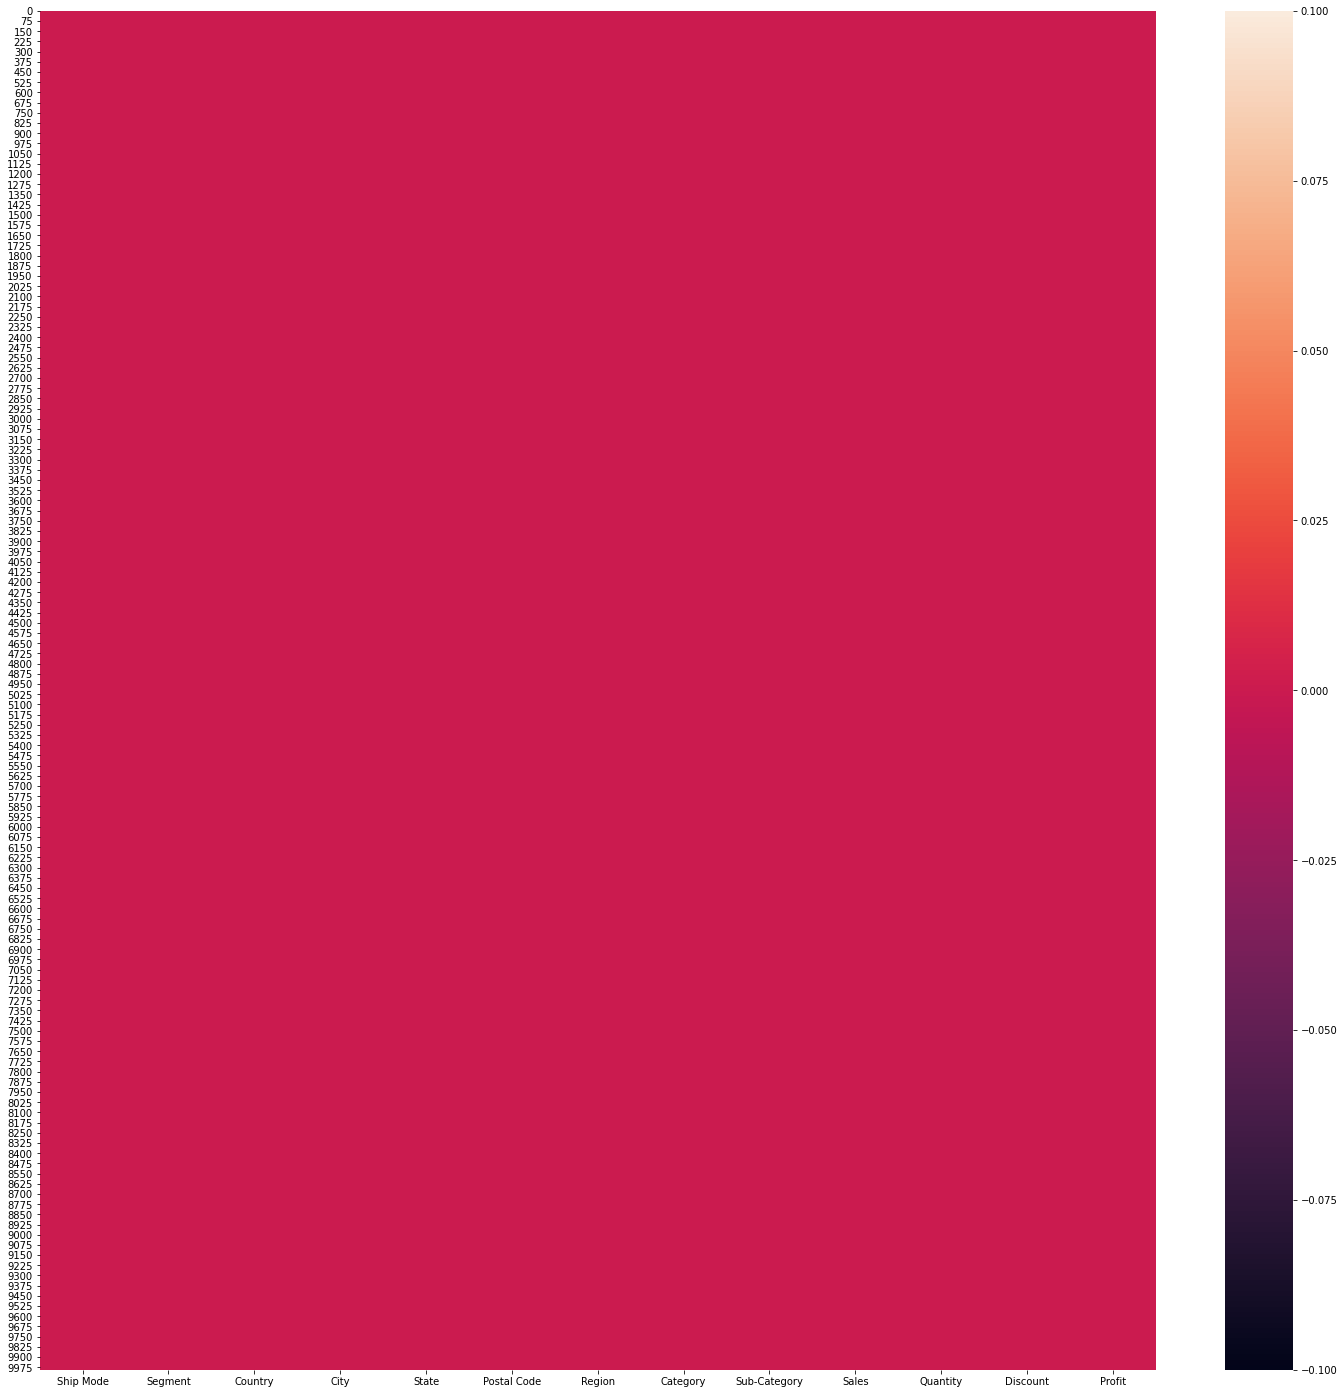

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [ ]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


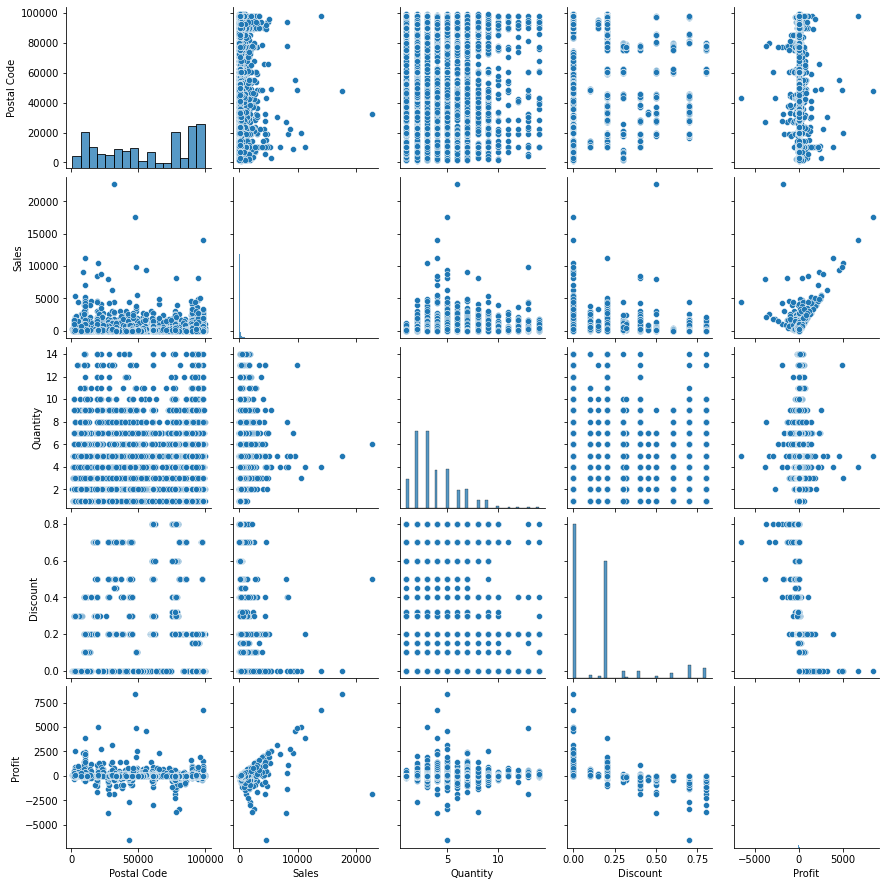

In [ ]:
sns.pairplot(df)

Text(0, 0.5, 'Sales')

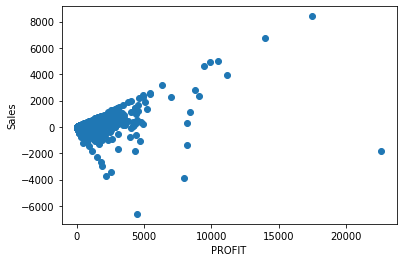

In [ ]:
sale=df["Sales"]
profit=df["Profit"]

plt.scatter(sale,profit)
plt.xlabel("PROFIT")
plt.ylabel("Sales")

Check for outliers

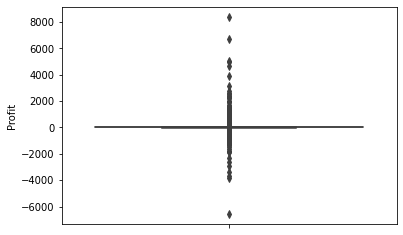

In [ ]:
sns.boxplot(y=df["Profit"])

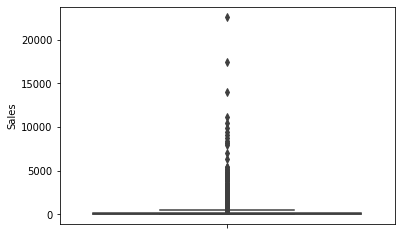

In [ ]:
sns.boxplot(y=df["Sales"])

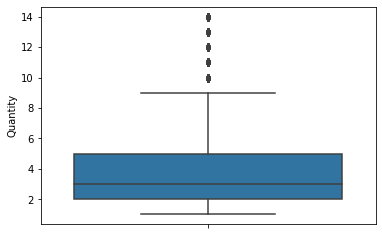

In [ ]:
sns.boxplot(y=df["Quantity"])

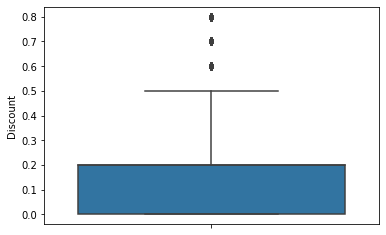

In [ ]:
sns.boxplot(y=df["Discount"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


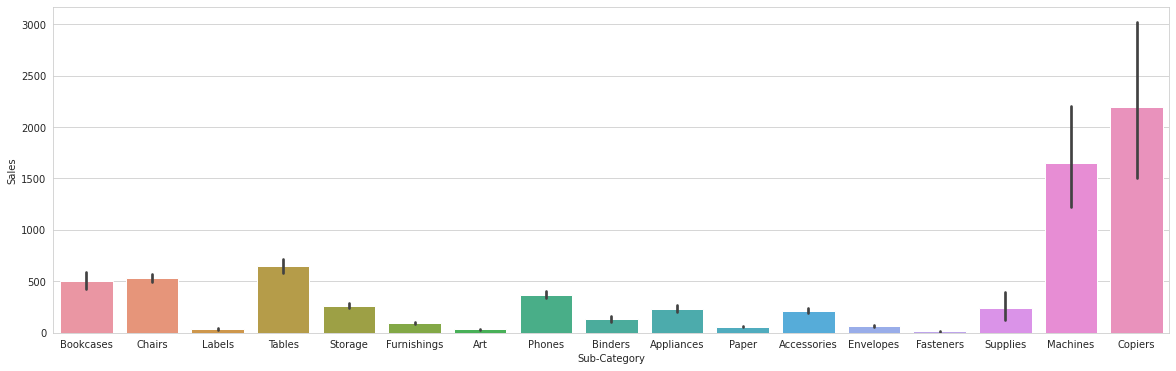

In [ ]:
fig_dim=(20,6)
fig,ax=plt.subplots(figsize=fig_dim)
sns.barplot(df["Sub-Category"],df["Sales"])


TOP PRODUCTS SALES 

Profit on Catergory

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


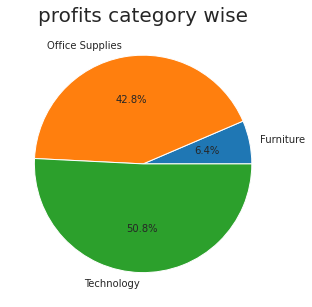

In [ ]:
dfprofit = df.groupby('Category')['Profit'].sum().reset_index()
print(dfprofit)
plt.figure(figsize=(5,5))
labels=dfprofit['Category'].unique()
plt.pie(dfprofit['Profit'],labels=labels,autopct='%1.1f%%')

plt.title('profits category wise',size=20)
plt.show()

MOST SELLING PRODUCT 

*in terms of quantity*

In [ ]:
quan_sale=pd.DataFrame(df.groupby('Sub-Category').sum()['Quantity'])
quan_sale.sort_values('Quantity',ascending=False)

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2356
Appliances,1729


   Sub-Category      Profit
0   Accessories  41936.6357
1    Appliances  18138.0054
2           Art   6527.7870
3       Binders  30221.7633
4     Bookcases  -3472.5560
5        Chairs  26590.1663
6       Copiers  55617.8249
7     Envelopes   6964.1767
8     Fasteners    949.5182
9   Furnishings  13059.1436
10       Labels   5546.2540
11     Machines   3384.7569
12        Paper  34053.5693
13       Phones  44515.7306
14      Storage  21278.8264
15     Supplies  -1189.0995
16       Tables -17725.4811


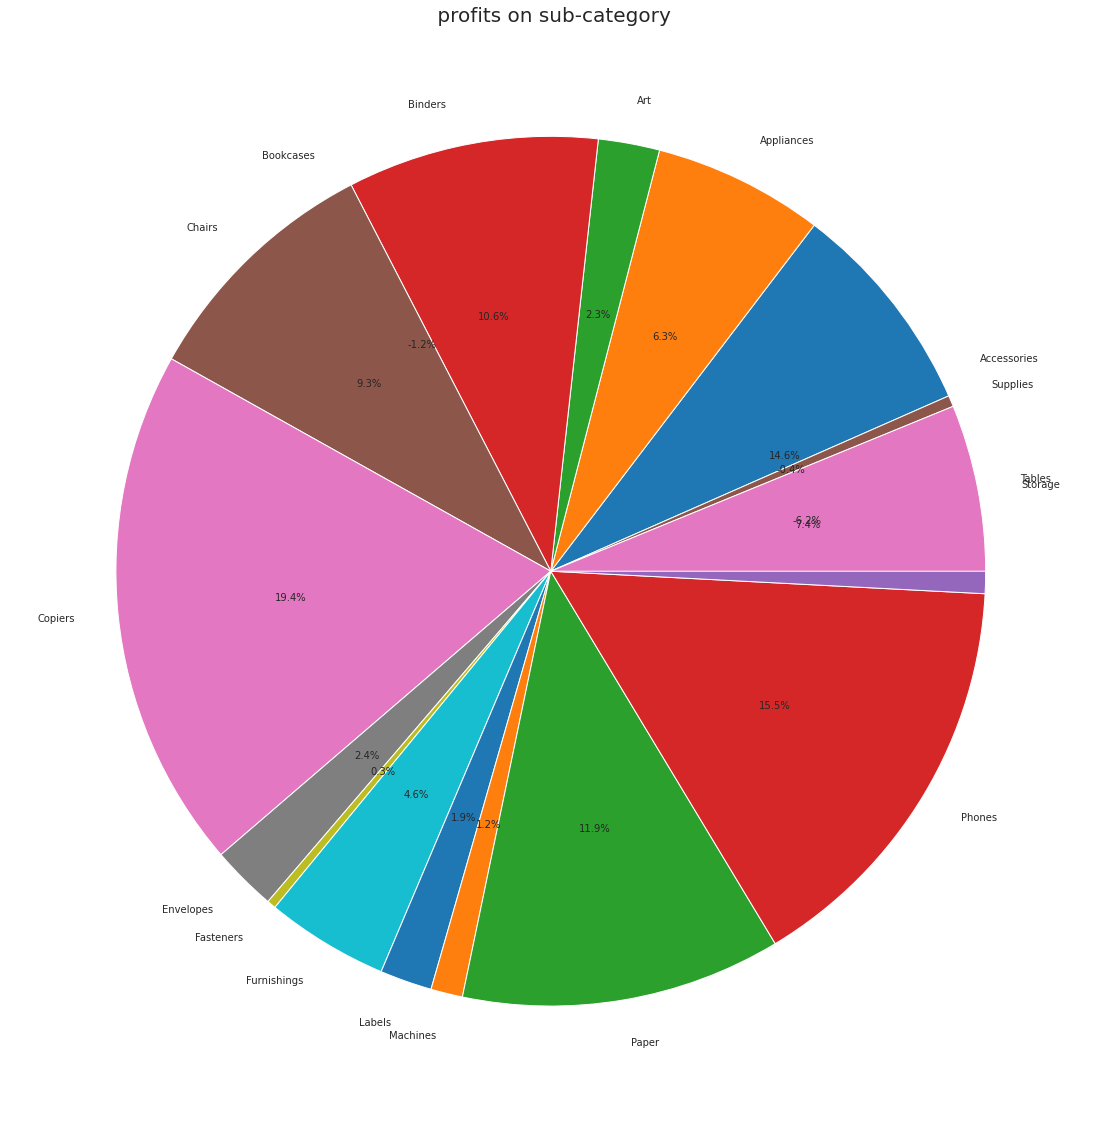

In [ ]:
dfprofit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
print(dfprofit)
plt.figure(figsize=(20,20))
labels=dfprofit['Sub-Category'].unique()
plt.pie(dfprofit['Profit'],autopct='%1.1f%%',labels=labels)

plt.title(' profits on sub-category',size=20)
plt.show()

BAR PLOT SHOWING THE SALES AND SEGMENT PLOT

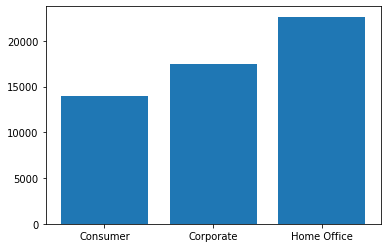

In [ ]:
plt.bar(df["Segment"],df["Sales"])

plt.show()

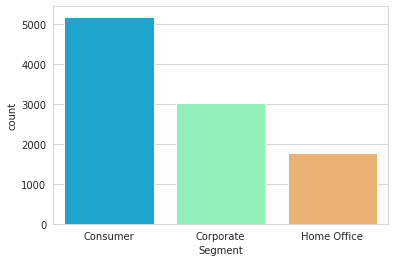

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=df, palette='rainbow')

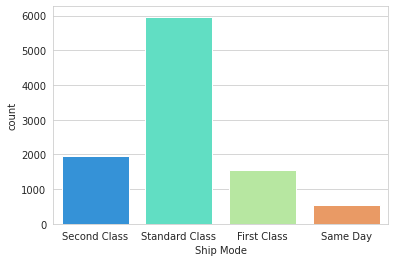

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Ship Mode',data=df, palette='rainbow')

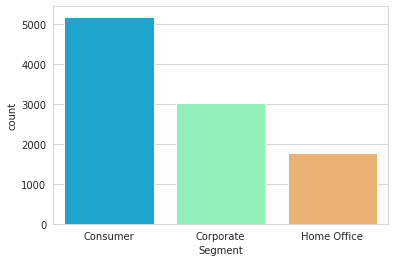

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=df, palette='rainbow')

In [ ]:
profit_country=pd.DataFrame(df.groupby('City').sum()['Profit'])
profit_country.sort_values('Profit',ascending=False)

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
...,...
Chicago,-6654.5688
Lancaster,-7239.0684
San Antonio,-7299.0502
